In [1]:
# Import library

import numpy as np
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [2]:
import string

def check_profanity(word, profanity_count):
    profanities = ['knob','crap', 'sex','goddamn', 'motherfucker', 'whore', 'slut','bullshit', 'ball', 'cow','turd','spastic', 'punk','damn','bollock', 'cock', 'bitch','fuck', 'bastard', 'dick', 'pussy', 'faggot', 'gay', 'cunt', 'shit', 'ass', 'asshole', 'dickhead', 'twat', 'rubbish', 'wanker']

    for profanity in profanities:
        if profanity in word:
            if profanity in profanity_count.keys():
                profanity_count[profanity] += 1
            elif profanity not in profanity_count.keys():
                profanity_count[profanity] = 1
                
def remove_puntuation(line, profanity_count):
    words = line.split()
    clean_words = [word.strip(string.punctuation).lower() for word in words]
    for clean_word in clean_words:
        check_profanity(clean_word, profanity_count)

def file_clean(contents, profanity_count, file_path):
    sns.set_context('notebook')
    sns.set_style('darkgrid')
    for line in contents:
        remove_puntuation(line, profanity_count)

    profanity_sorted = sorted(list(profanity_count.items()), key = lambda x:x[1], reverse = True)
    labels = [x[0] for x in profanity_sorted]
    counts = [x[1] for x in profanity_sorted]

    profanity_bar = sns.barplot(x = counts, y = labels, palette= "rocket")
    profanity_bar.set_xlabel("Frequency")
    profanity_bar.set_ylabel("Profanties")
    profanity_bar.set_title(f"Frequency of Profanities from '{file_path[:-4]}' Novels")
    profanity_bar;
    
def open_file(file_path):
    profanity_count = {}
    file_obj = open(file_path, mode = 'r')
    file_contents = file_obj.readlines()    
    file_clean(file_contents, profanity_count, file_path)
    file_obj.close()
                    

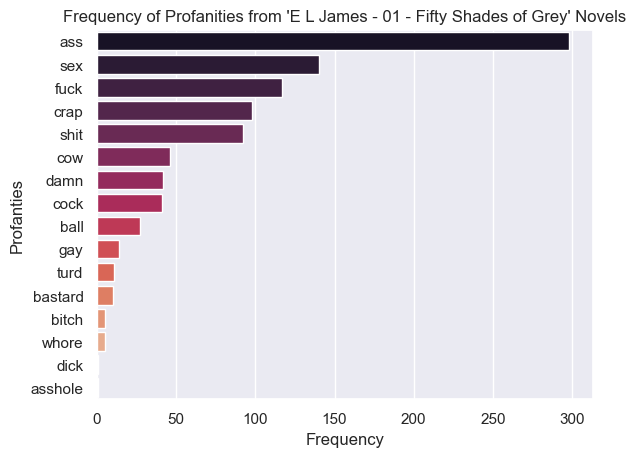

In [3]:
# Read the file

fifty_shades_grey_path = 'E L James - 01 - Fifty Shades of Grey.txt'

fifty_shades_darker_path = 'Fifty-Shades-Darker.txt'

open_file(fifty_shades_grey_path);




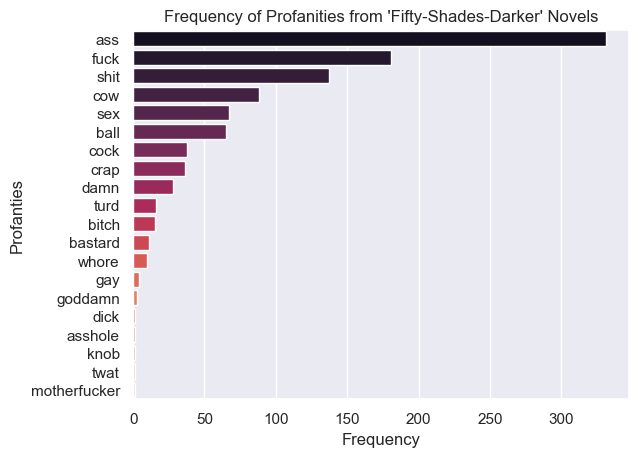

In [4]:
open_file(fifty_shades_darker_path);